In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train=pd.read_csv('aug_train.csv')
data_test=pd.read_csv('aug_test.csv')
data_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


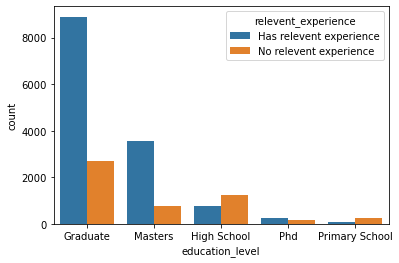

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data_train['education_level'],hue=data_train['relevent_experience'])


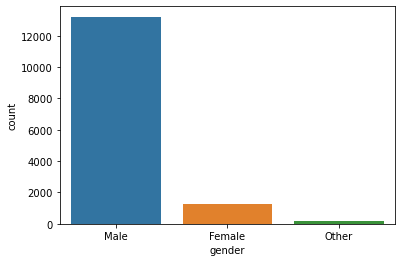

In [4]:
plt.figure()
sns.countplot(x = data_train['gender'])
plt.show()

In [5]:
for i in data_train:
    if data_train[i].dtype == 'object':
        print(i,data_train[i].unique())

city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np
for i in data_train:
    if data_train[i].isna().sum()>0:
        imr=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        imr=imr.fit(data_train[[i]])
        imputed_data=imr.transform(data_train[[i]])
        data_train[i]=imputed_data

In [4]:
from sklearn.preprocessing import LabelEncoder
for c in data_train.columns:
    le = LabelEncoder()
    if data_train.dtypes[c] == object:
        le.fit(data_train[c].astype(str))
        data_train[c] = le.transform(data_train[c].astype(str))

In [5]:
y=data_train['target']
X=data_train.drop(['target','enrollee_id'],axis=1)
print(y.value_counts())

0.0    14381
1.0     4777
Name: target, dtype: int64


In [6]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
ndf=norm.fit_transform(X)
X = pd.DataFrame(ndf, index=X.index, columns=X.columns)
X.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,1.219489,0.361261,0.393556,-0.902189,-0.488985
1,0.925077,-0.428410,0.204235,1.603202,0.568358,-0.692508,0.296787,-1.050773,0.361261,0.393556,1.164364,-0.305825
2,0.558499,-1.660590,0.204235,1.603202,-1.931321,-0.692508,0.296787,0.311384,0.361261,0.393556,1.681003,0.293607
3,-0.851418,-0.323026,0.204235,1.603202,0.568358,-0.692508,-3.909499,1.068138,0.361261,0.393556,1.681003,-0.222571
4,0.163722,-0.501368,0.204235,-0.623752,0.568358,1.315676,0.296787,1.219489,0.361261,-2.690501,0.647726,-0.955209
5,0.361110,-0.525687,0.204235,-0.623752,-0.681482,-0.692508,0.296787,-1.656176,0.361261,0.393556,-0.902189,-0.688795
6,0.135524,0.738919,0.204235,-0.623752,0.568358,0.311584,0.296787,0.311384,0.361261,-2.690501,-0.902189,-0.688795
7,1.094267,-0.541900,0.204235,-0.623752,0.568358,-0.692508,0.296787,-1.353475,2.043168,0.393556,1.164364,-0.788700
8,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,0.614085,0.361261,0.393556,-0.902189,-0.322476
9,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,-0.748072,-0.199374,0.393556,1.164364,0.959642


In [7]:
# Due to the presence of imblananced dataset where target 0 > target 1 which can lead to overfitting, we perform ADASYN method
from imblearn.over_sampling import ADASYN 
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_resampled,y_resampled,train_size=0.7, random_state=42)

In [54]:
import lightgbm as lgb

clf=lgb.LGBMClassifier(learning_rate=0.1,boosting_type='gbdt', objective='binary', metric='auc')
# default num_leaves=31, max_depth of trees=-1 
clf.fit(X_train,y_train) 

LGBMClassifier(metric='auc', objective='binary')

In [55]:
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      4315
         1.0       0.84      0.85      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8409090909090909

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.840945120418834

In [137]:
# Using RandomizedSearchCV for finding the best combination of hyperparameter values.
from sklearn.model_selection import RandomizedSearchCV

params = {
    'learning_rate': [0.025, 0.05,0.1],
    'num_leaves': [50,100,150,200,250],
    'boosting_type' : ['gbdt', 'goss'],
    'objective' : ['binary'], #for performing binary classification
    'max_depth' : [3,4,5,6,7,8,9,10,-1], # -1 means no limit
    'random_state' : [42], 
    'min_split_gain' : [0.01],
    'metric':['auc']
    }
clf = lgb.LGBMClassifier()
RSCV = RandomizedSearchCV(clf,params,verbose=3,cv=10,n_jobs = -1)
RSCV.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'goss'],
                                        'learning_rate': [0.025, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      -1],
                                        'metric': ['auc'],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [50, 100, 150, 200, 250],
                                        'objective': ['binary'],
                                        'random_state': [42]},
                   verbose=3)

In [138]:
y_pred=RSCV.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      4315
         1.0       0.84      0.85      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8446386946386947

In [140]:
print(RSCV.best_estimator_)  

LGBMClassifier(learning_rate=0.05, metric='auc', min_split_gain=0.01,
               num_leaves=200, objective='binary', random_state=42)


In [62]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [63]:
data_test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [64]:
from sklearn.impute import SimpleImputer
import numpy as np
for i in data_test:
    if data_test[i].isna().sum()>0:
        imr=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        imr=imr.fit(data_test[[i]])
        imputed_data=imr.transform(data_test[[i]])
        data_test[i]=imputed_data

In [65]:
from sklearn.preprocessing import LabelEncoder
for c in data_test.columns:
    le = LabelEncoder()
    if data_test.dtypes[c] == object:
        le.fit(data_test[c].astype(str))
        data_test[c] = le.transform(data_test[c].astype(str))

In [66]:
data_test['target']=''
X=data_test.drop(['target','enrollee_id'],axis=1)

In [67]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
ndf=norm.fit_transform(X)
X = pd.DataFrame(ndf, index=X.index, columns=X.columns)
X.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.036680,0.016126,0.196708,-0.630065,-1.878304,-0.705098,0.291135,0.888727,1.987886,0.383779,-0.904106,-0.730319
1,-1.103659,0.759860,-3.509406,-0.630065,0.587115,-0.705098,0.291135,0.282188,0.364069,0.383779,-0.904106,0.548230
2,0.568480,-1.607295,0.196708,1.587138,0.587115,0.282503,0.291135,1.040362,0.364069,0.383779,1.720439,-0.829946
3,-0.535132,0.016126,0.196708,-0.630065,0.587115,1.270103,0.291135,-1.689066,-1.801021,0.383779,-0.904106,-0.431437
4,-1.103659,0.759860,0.196708,-0.630065,0.587115,-0.705098,0.291135,1.191997,-0.177204,0.383779,1.195530,0.116513
5,0.601923,0.591920,0.196708,1.587138,-0.645595,1.270103,0.291135,-1.840701,0.364069,0.383779,-0.379197,-0.879760
6,0.568480,-1.607295,0.196708,-0.630065,0.587115,-0.705098,0.291135,1.040362,-1.259748,0.383779,-0.904106,-0.896364
7,0.133724,0.759860,-3.509406,-0.630065,0.587115,-0.705098,0.291135,1.191997,0.364069,0.383779,1.195530,0.265953
8,0.300938,0.423980,0.196708,-0.630065,0.587115,-0.705098,0.291135,-1.234161,0.364069,0.383779,0.670621,-1.045805
9,0.568480,-1.607295,0.196708,-0.630065,-1.878304,-0.705098,0.291135,-0.021082,0.364069,-2.811002,-0.904106,-1.012596


In [68]:
data_test['target']=RSCV.predict(X)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [70]:
gb = GaussianNB()
gb.fit(X_train,y_train)
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66      4315
         1.0       0.65      0.61      0.63      4265

    accuracy                           0.64      8580
   macro avg       0.64      0.64      0.64      8580
weighted avg       0.64      0.64      0.64      8580



In [98]:
accuracy_score(y_test, gb.predict(X_test))

0.6441724941724942

In [99]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68      4315
         1.0       0.67      0.59      0.63      4265

    accuracy                           0.65      8580
   macro avg       0.66      0.65      0.65      8580
weighted avg       0.66      0.65      0.65      8580



In [100]:
accuracy_score(y_test, lr.predict(X_test))

0.6538461538461539

In [103]:
lr=LogisticRegression(C=0.5, max_iter=500, multi_class='ovr',n_jobs=-1, warm_start=True)  
#warm start is to reuse the solution of the previous call to fit as initialization
lr.fit(X_train,y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68      4315
         1.0       0.67      0.59      0.63      4265

    accuracy                           0.65      8580
   macro avg       0.66      0.65      0.65      8580
weighted avg       0.66      0.65      0.65      8580



In [104]:
accuracy_score(y_test, lr.predict(X_test))

0.6538461538461539

In [77]:
rfc = RandomForestClassifier() # default values max_depth=None
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      4315
         1.0       0.83      0.84      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [78]:
accuracy_score(y_test, rfc.predict(X_test))

0.8357808857808858

In [94]:
rfc=RandomForestClassifier(max_depth=500, min_samples_split=2, max_features='sqrt')
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      4315
         1.0       0.83      0.84      0.83      4265

    accuracy                           0.83      8580
   macro avg       0.83      0.83      0.83      8580
weighted avg       0.83      0.83      0.83      8580



In [95]:
accuracy_score(y_test, rfc.predict(X_test))

0.8340326340326341

In [96]:
rfc=RandomForestClassifier(max_depth=100, min_samples_split=5, max_features='log2')
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      4315
         1.0       0.83      0.85      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [97]:
accuracy_score(y_test, rfc.predict(X_test))

0.8390442890442891

In [106]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_train,y_train)
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      4315
         1.0       0.84      0.83      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [116]:

xgb = XGBClassifier(max_depth=10, eta=0.05,gamma=0.01, objective='binary:logistic', eval_metric='error')
xgb.fit(X_train,y_train)
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      4315
         1.0       0.82      0.86      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [117]:
accuracy_score(y_test, xgb.predict(X_test))

0.8388111888111888

In [119]:
params={
    'eta': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3,4,5,6,7,8,9,10],
    'eval_metric': ['error', 'auc'],
    'objective': ['binary:logistic'],
    'min_child_weight':[0.25,0.05,0.1]
}
xgb=XGBClassifier()
RSCV = RandomizedSearchCV(xgb,params,verbose=3,cv=5,n_jobs= -1)
RSCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [122]:
print(classification_report(y_test, RSCV.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      4315
         1.0       0.85      0.83      0.84      4265

    accuracy                           0.84      8580
   macro avg       0.84      0.84      0.84      8580
weighted avg       0.84      0.84      0.84      8580



In [124]:
accuracy_score(y_test, RSCV.predict(X_test))

0.8437062937062937

In [125]:
print(RSCV.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=10, min_child_weight=0.05,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ThresholdedReLU

In [30]:
norm = tf.keras.layers.LayerNormalization(
    epsilon=0.001,
    center=True,
    scale=True
)

In [31]:
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.AUC(name='auc'),
]

In [32]:
model = Sequential()

model.add(norm)
model.add(ThresholdedReLU(theta=10)) # Theta is a threshold which determines the output result of a particular neuron.
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

626/626 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 2/10
626/626 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5018
Epoch 3/10
626/626 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 4/10
626/626 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4998
Epoch 5/10
626/626 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 6/

In [35]:
model.evaluate(X_test, y_test)

269/269 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4971


[0.693152129650116, 0.4970862567424774]